In [ ]:
# @title KNN
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

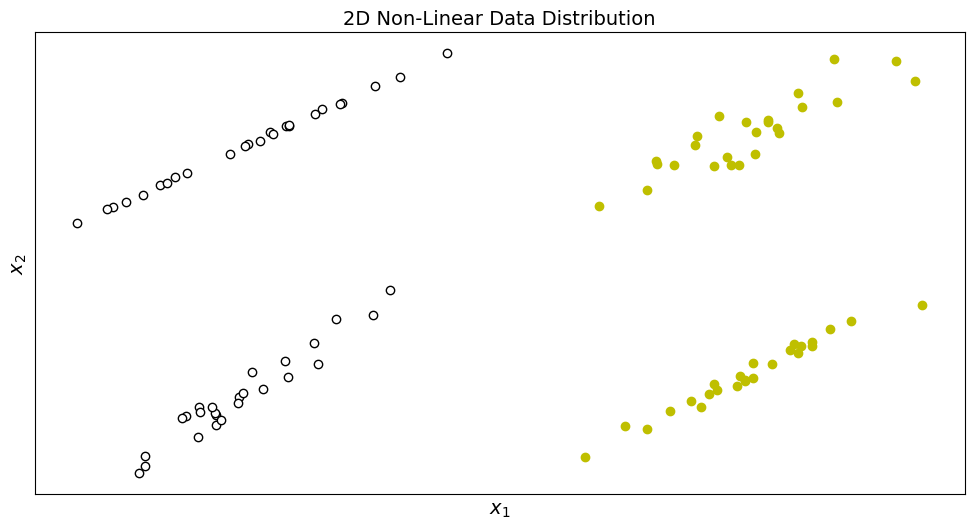

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant = 0, n_classes=2, class_sep=2.0, random_state=42)
plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [ ]:
#Standardize the Data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):

    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1

    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1

    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # print(x1,x2)
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)

    if(plotDistanceFromHyperplane == True):

        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

    if(colorBar==True):
        plt.colorbar()

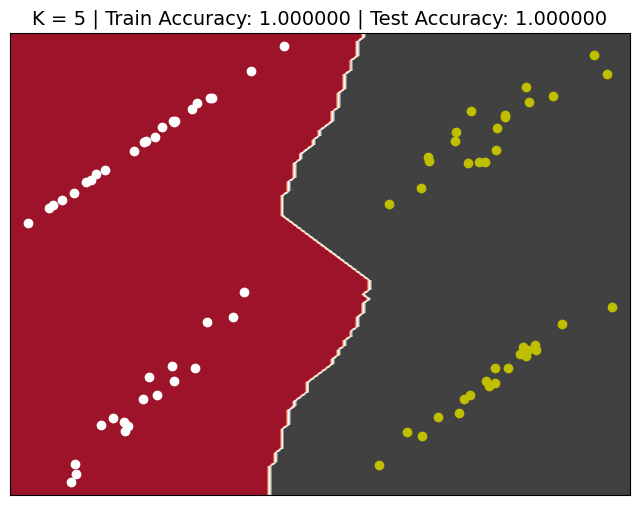

In [ ]:
# Set the the range of K
k = 5
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f" %(k, train_accuracy, test_accuracy) , fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

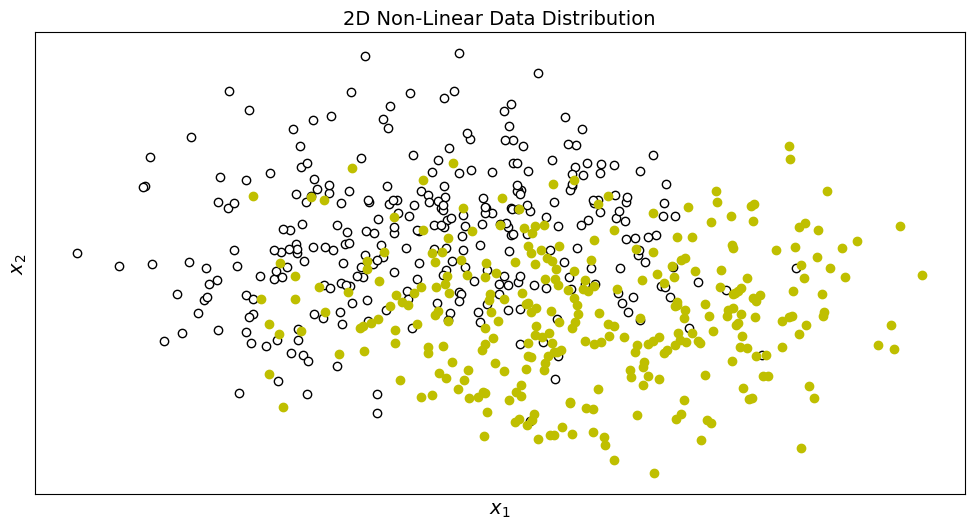

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=600, noise=0.55, random_state=0)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 2)
(120, 2)
(480,)
(120,)


In [ ]:
#Standardize the Data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

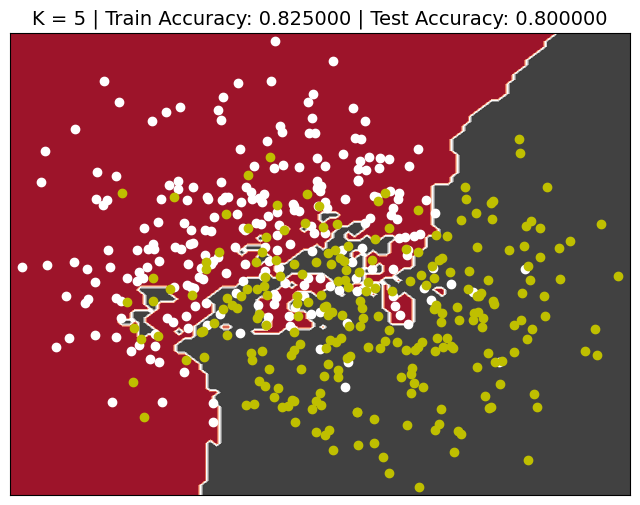

In [ ]:
# Set the the range of K
k = 5
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f"%
        (k, train_accuracy, test_accuracy) , fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

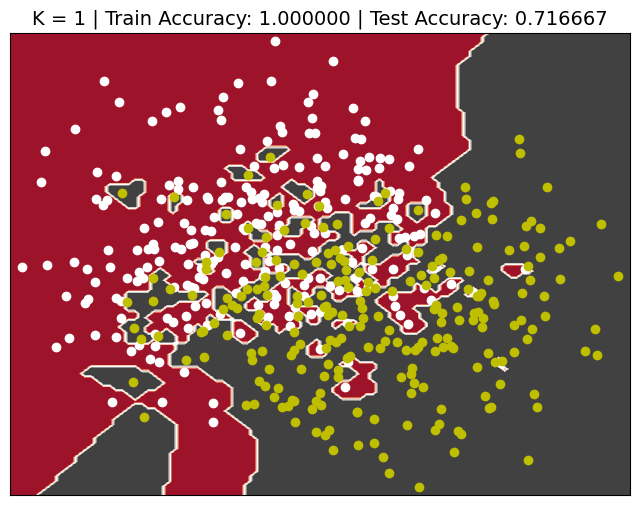

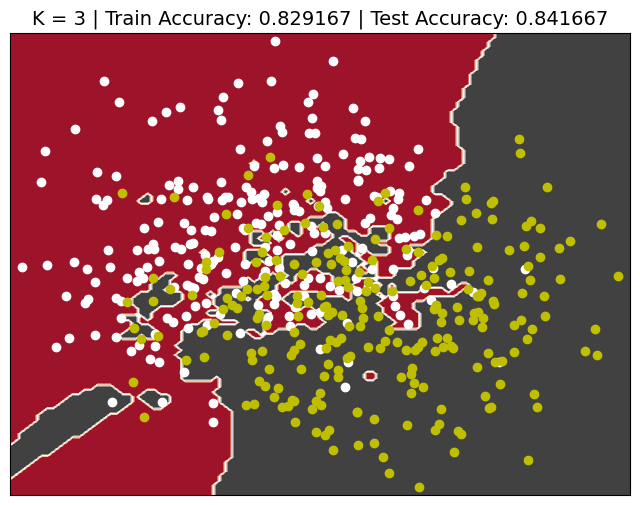

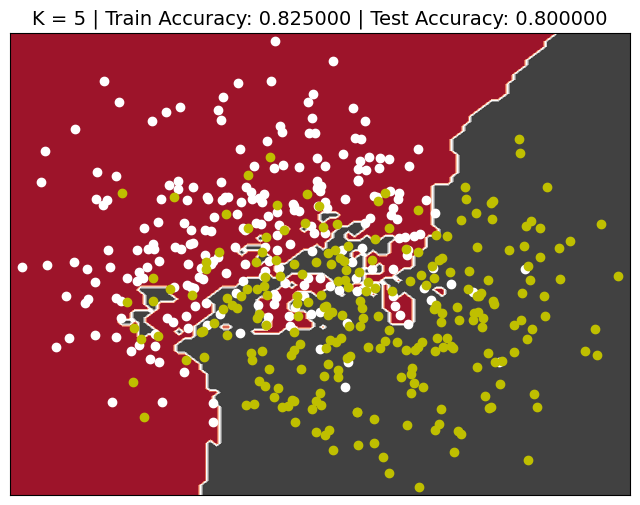

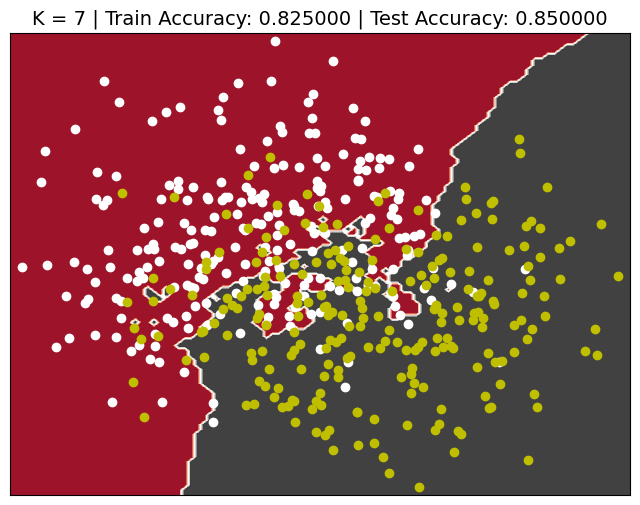

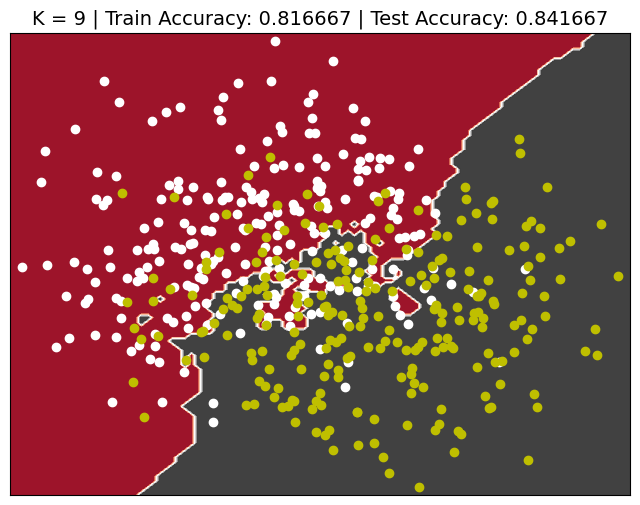

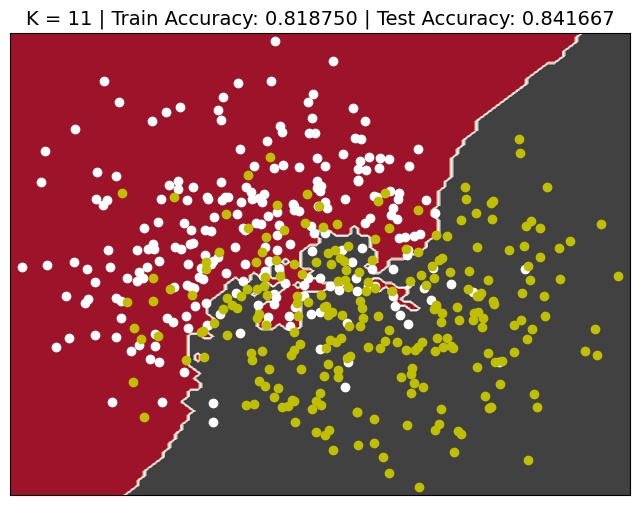

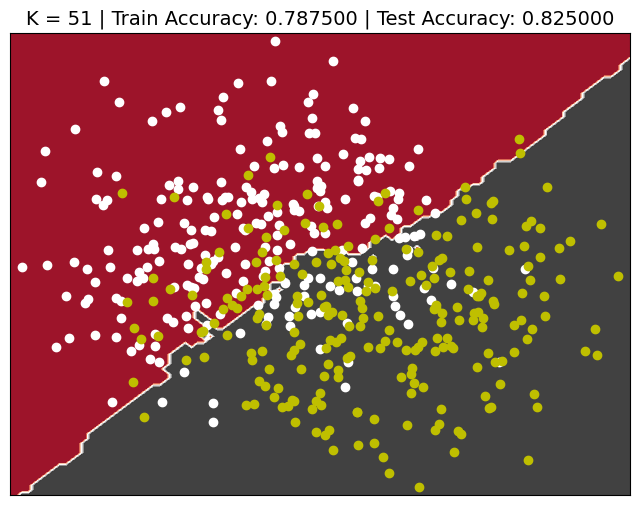

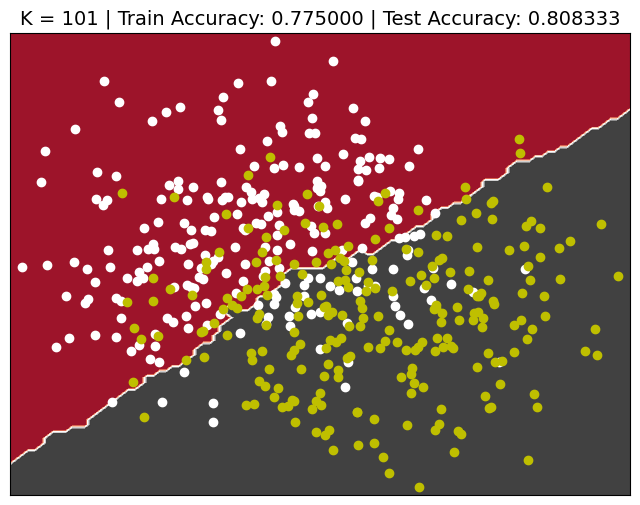

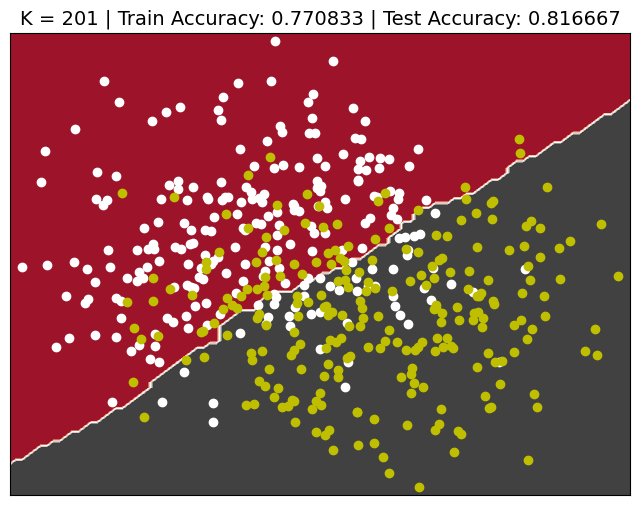

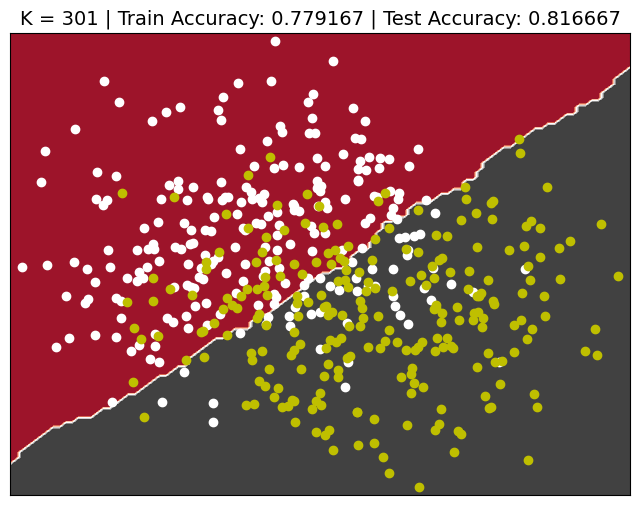

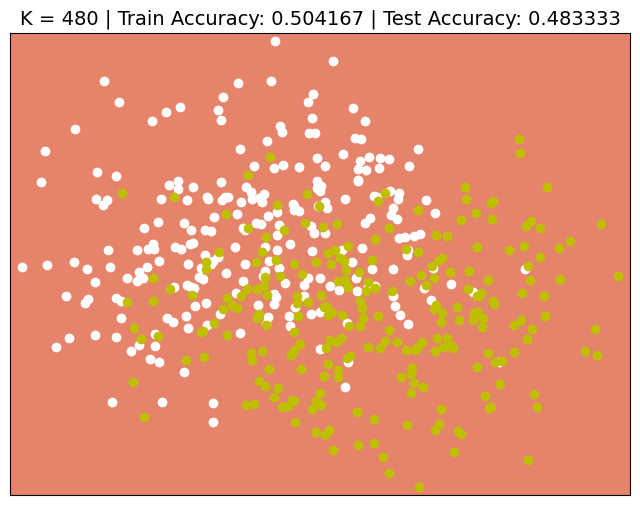

In [ ]:
# Set the the range of K
neighbors = [1, 3, 5, 7, 9, 11, 51, 101, 201, 301, 480]

for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy = knn.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy = knn.score(X_test, y_test)

    # Show the decision boundary only on the training data
    plt.figure(figsize=(8,6))
    decision_boundary_class_colored(knn, X_train, plotDistanceFromHyperplane=False)
    plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
    plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
    plt.title("K = %d | Train Accuracy: %f | Test Accuracy: %f"%
              (k, train_accuracy, test_accuracy) , fontsize=14)
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [ ]:
# @title Logistic Regression
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)

    if(plotDistanceFromHyperplane == True):
        y_decision = clf.decision_function(X_new).reshape(x1.shape)
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

    if(colorBar==True):
        plt.colorbar()

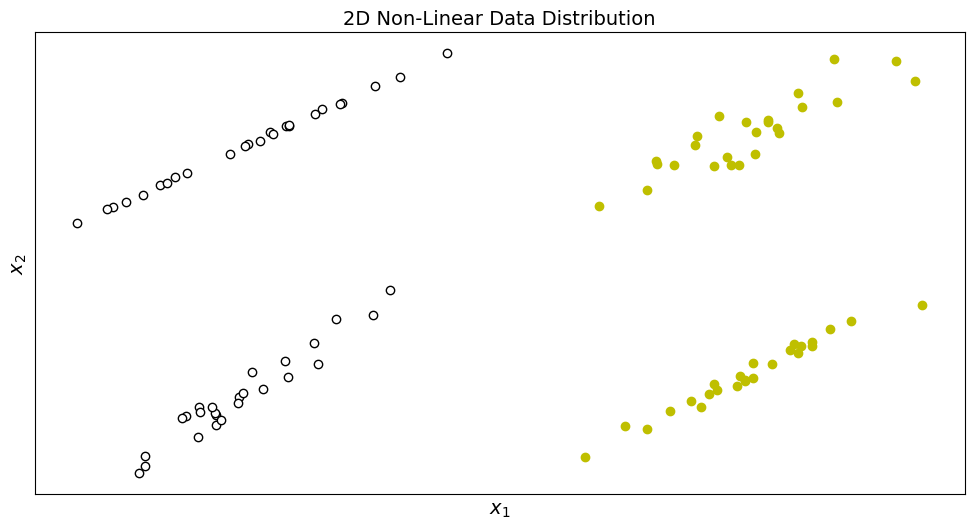

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, class_sep=2.0, random_state=42)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Compute accuracy on the training set
train_accuracy = log_reg.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = log_reg.score(X_test, y_test)

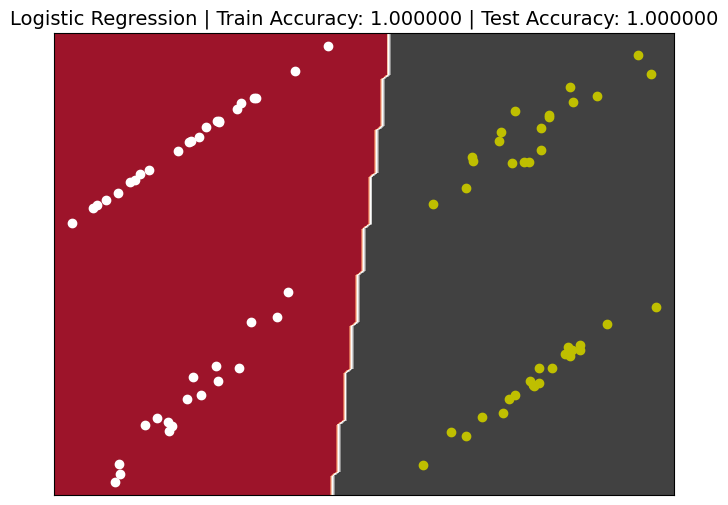

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(log_reg, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")
plt.title("Logistic Regression | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

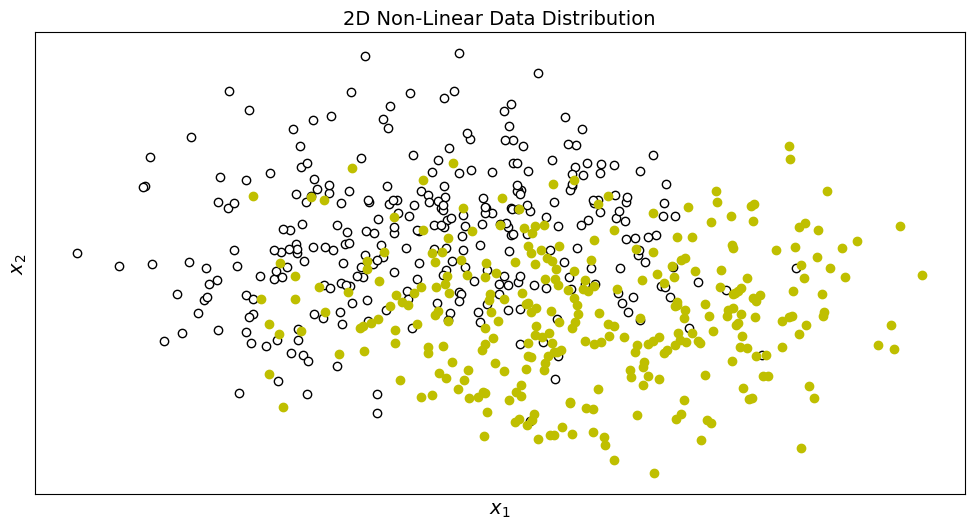

In [ ]:
# Generate another synthetic dataset
X, y = make_moons(n_samples=600, noise=0.55, random_state=0)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = log_reg.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = log_reg.score(X_test, y_test)

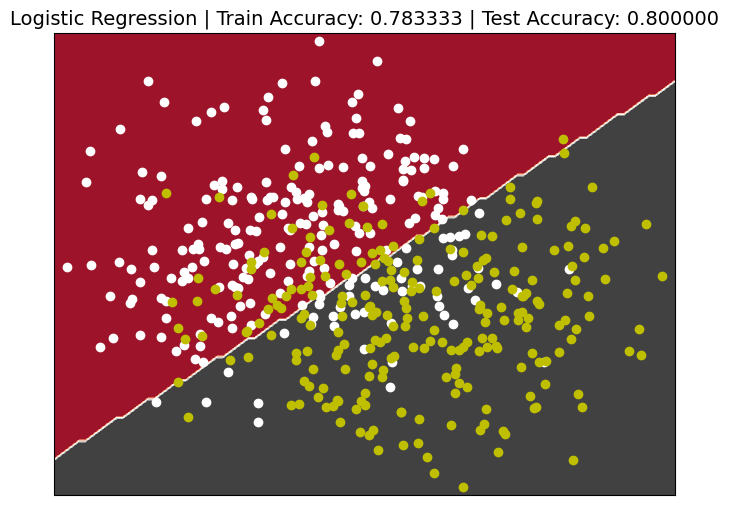

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(log_reg, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Logistic Regression | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# @title Support Vector Machine
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)

    if(plotDistanceFromHyperplane == True):
        y_decision = clf.decision_function(X_new).reshape(x1.shape)
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

    if(colorBar==True):
        plt.colorbar()

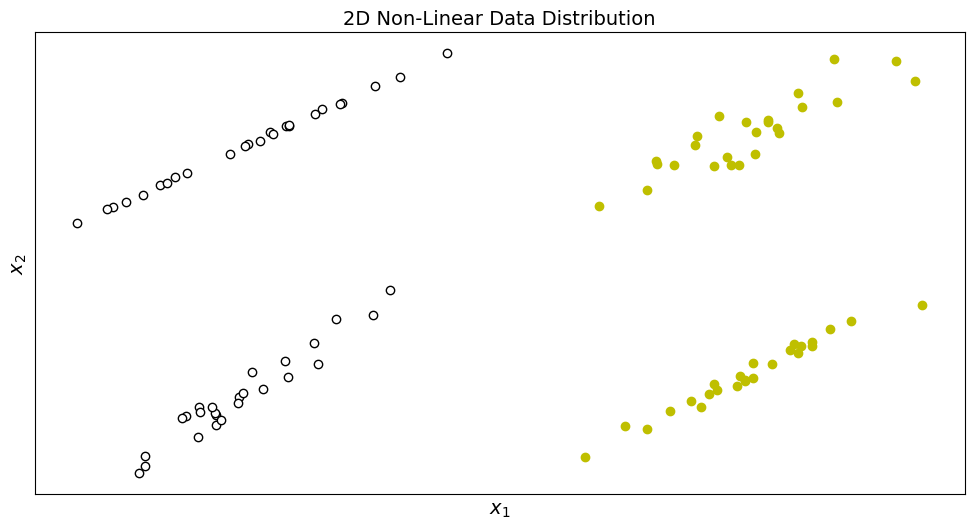

In [ ]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, class_sep=2.0, random_state=42)
plt.figure(figsize=(12, 6))

plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = svm.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = svm.score(X_test, y_test)

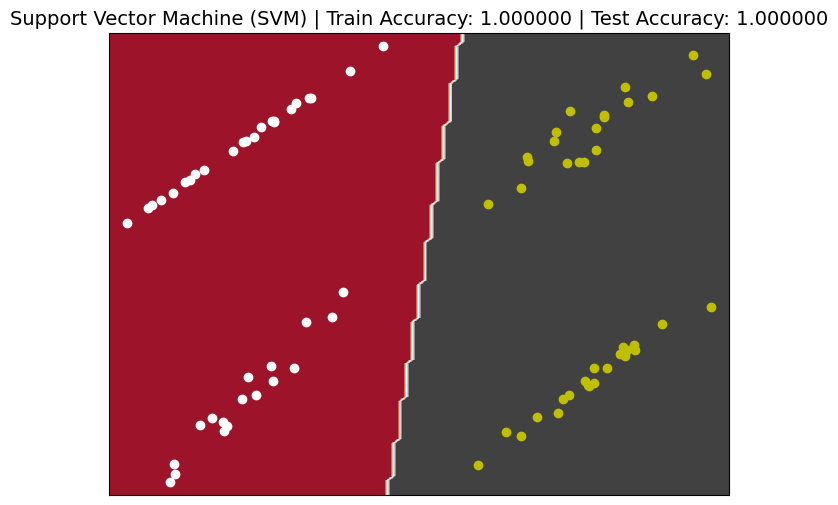

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(svm, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Support Vector Machine (SVM) | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

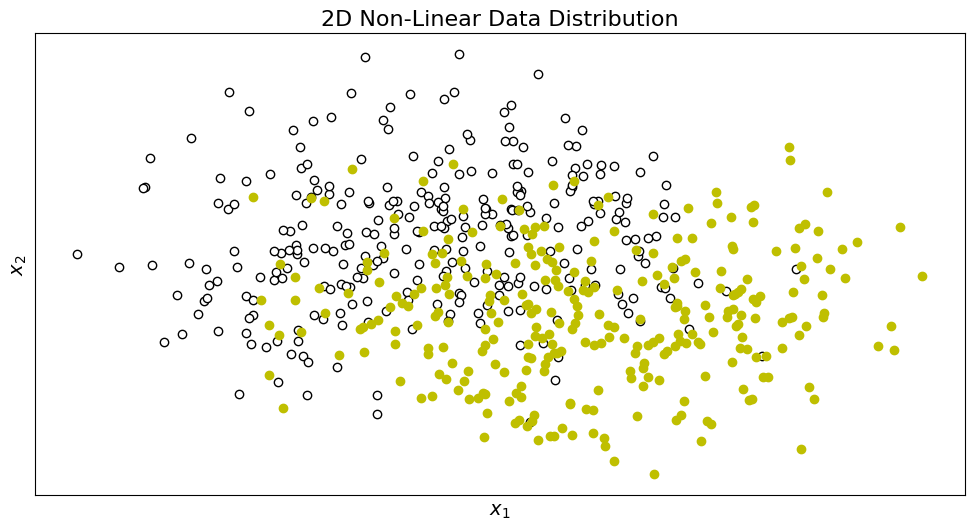

In [ ]:
# Generate another synthetic dataset
X, y = make_moons(n_samples=600, noise=0.55, random_state=0)
plt.figure(figsize=(12, 6))

plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=16)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = svm.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = svm.score(X_test, y_test)

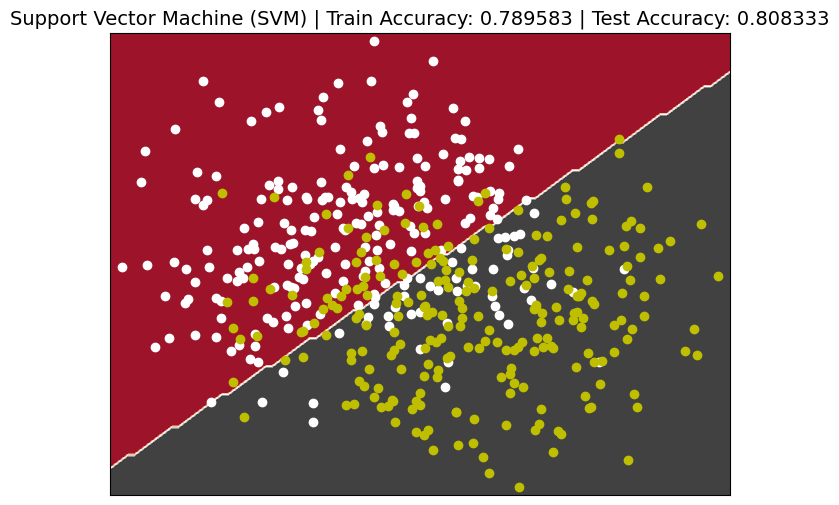

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))

decision_boundary_class_colored(svm, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Support Vector Machine (SVM) | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# @title Decision Tree
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    x1min, x1max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
    x2min, x2max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.RdGy, alpha=0.99)

    if(plotDistanceFromHyperplane == True):
        y_decision = clf.decision_function(X_new).reshape(x1.shape)
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)

    if(colorBar==True):
        plt.colorbar()

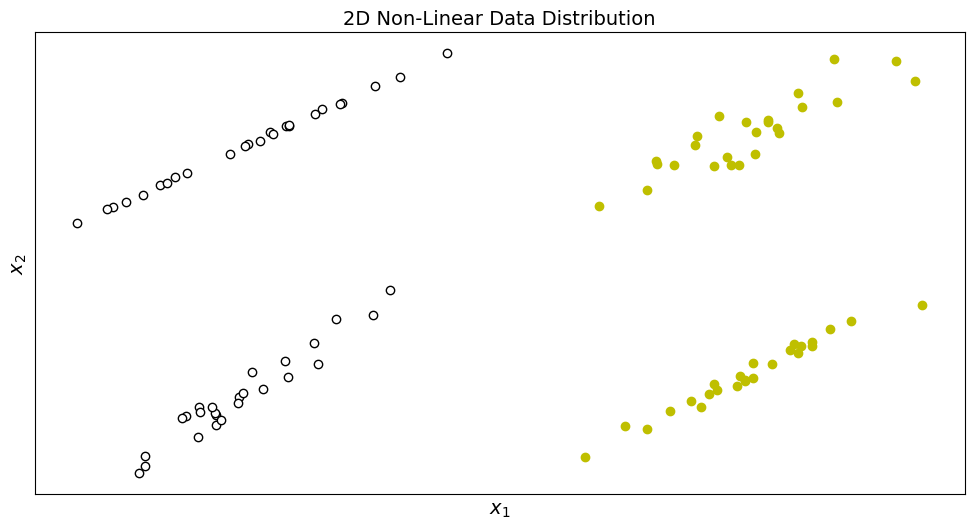

In [ ]:
# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, class_sep=2.0, random_state=42)
plt.figure(figsize=(12, 6))

plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = dtc.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = dtc.score(X_test, y_test)

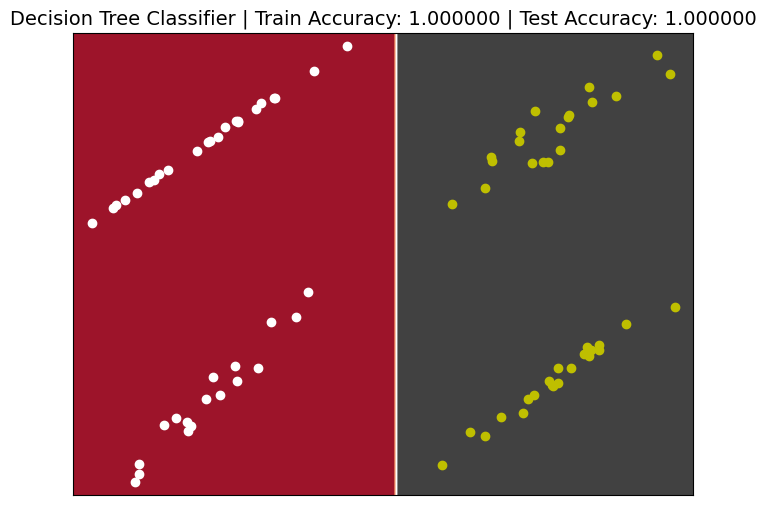

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))
decision_boundary_class_colored(dtc, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Decision Tree Classifier | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

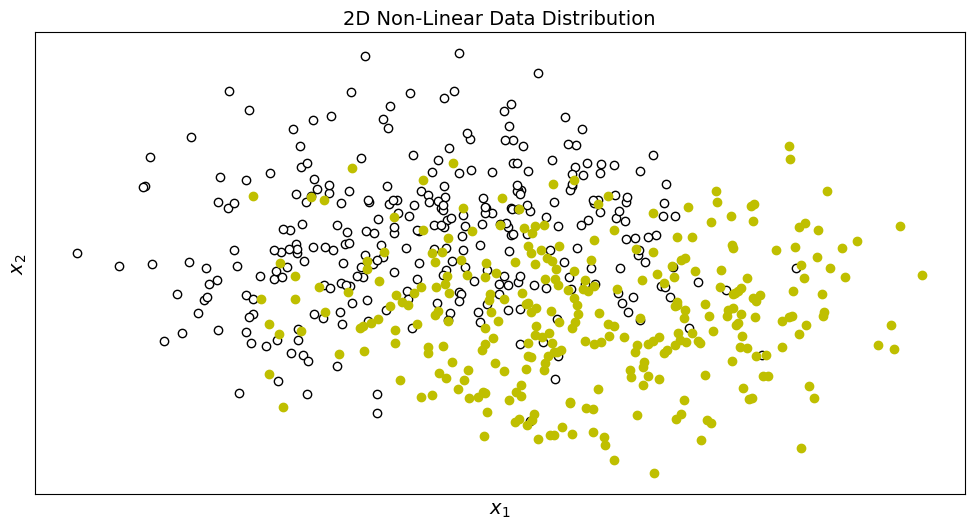

In [ ]:
# Generate another synthetic dataset
X, y = make_moons(n_samples=600, noise=0.55, random_state=0)

plt.figure(figsize=(12, 6))

plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "wo", markeredgecolor="k")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")

plt.title("2D Non-Linear Data Distribution", fontsize=14)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()


In [ ]:
# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Compute accuracy on the training set
train_accuracy = dtc.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = dtc.score(X_test, y_test)

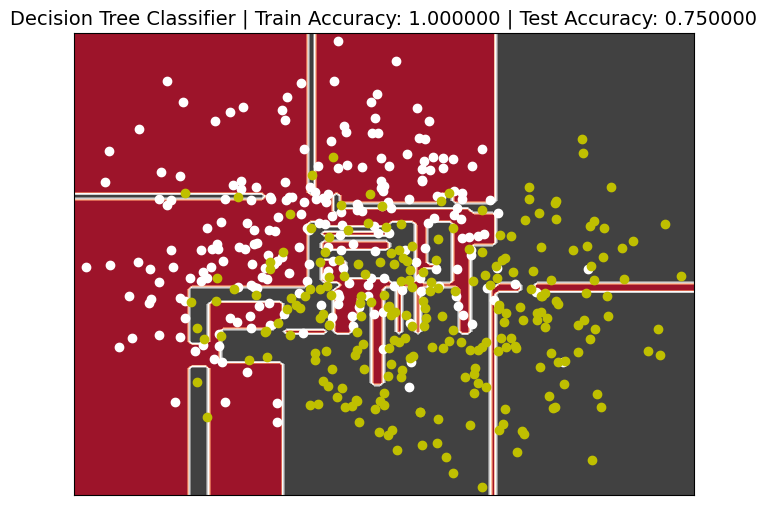

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))

decision_boundary_class_colored(dtc, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Decision Tree Classifier | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search with the DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Compute accuracy on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test accuracy: 0.8


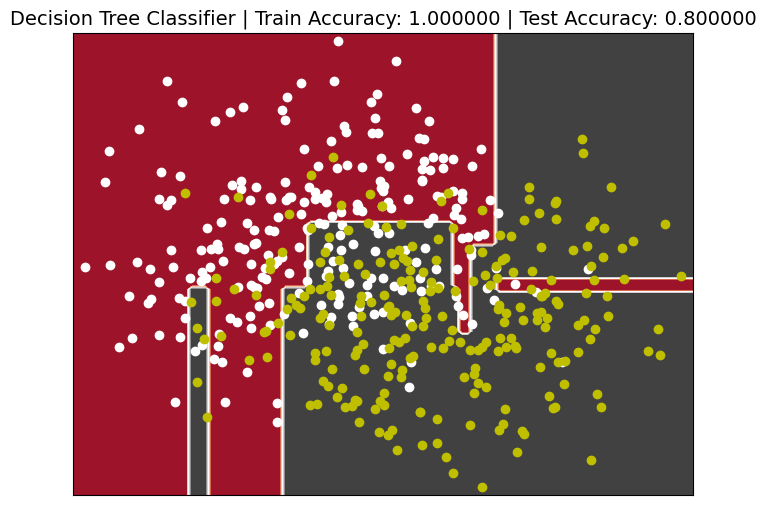

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))

decision_boundary_class_colored(best_model, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Decision Tree Classifier | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Compute accuracy on the training set
train_accuracy = rf_classifier.score(X_train, y_train)

# Compute accuracy on the test set
test_accuracy = rf_classifier.score(X_test, y_test)

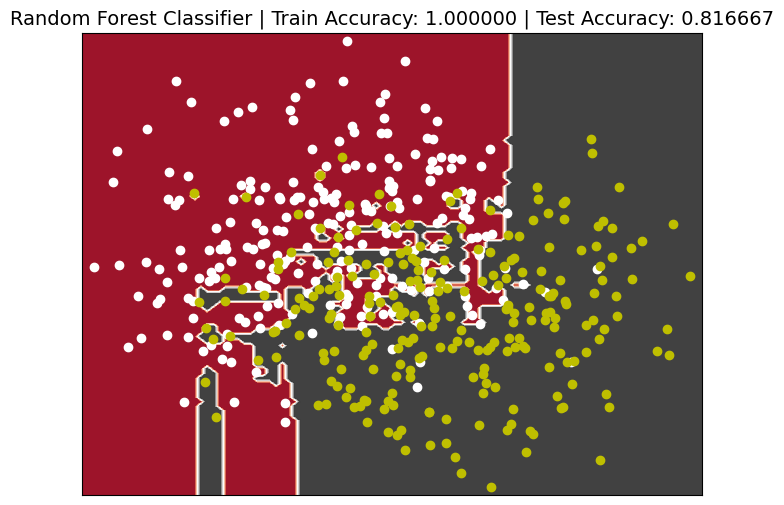

In [ ]:
# Show the decision boundary only on the training data
plt.figure(figsize=(8,6))

decision_boundary_class_colored(rf_classifier, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train.ravel()==0, 0], X_train[y_train.ravel()==0, 1], "wo")
plt.plot(X_train[y_train.ravel()==1, 0], X_train[y_train.ravel()==1, 1], "yo")

plt.title("Random Forest Classifier | Train Accuracy: %f | Test Accuracy: %f" %(train_accuracy, test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Compute accuracy on the test set using the best estimator
test_accuracy = best_estimator.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test Accuracy with Best Estimator:", test_accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy with Best Estimator: 0.8416666666666667


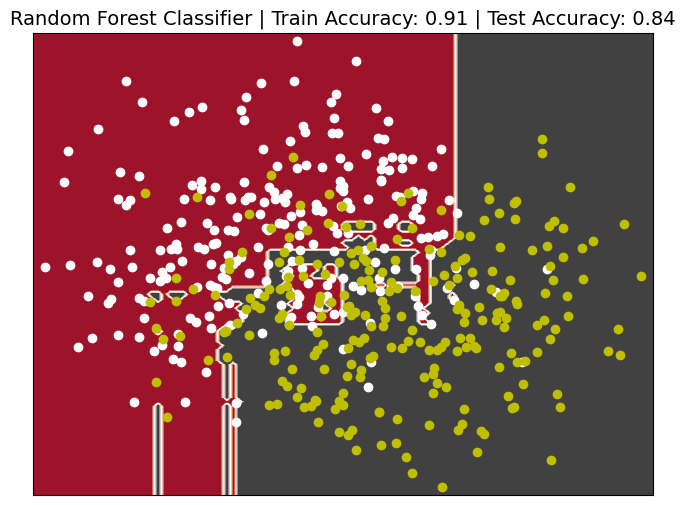

In [ ]:
# Plot decision boundary for Random Forest Classifier with increased test accuracy
plt.figure(figsize=(8, 6))

decision_boundary_class_colored(best_estimator, X_train, plotDistanceFromHyperplane=False)

plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "wo")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "yo")

plt.title("Random Forest Classifier | Train Accuracy: {:.2f} | Test Accuracy: {:.2f}".format(
    best_estimator.score(X_train, y_train), test_accuracy), fontsize=14)

plt.xticks(())
plt.yticks(())

plt.show()